# Chi Square

The idea behind the chi-square test of independence, much like the analysis of variance is to measure how far the data are from what is claimed in the null hypothesis. The further the data are from the null hypothesis, the more evidence the data presents against it.

To represent the null hypothesis, we're gonna calculate another set of counts. The counts that we would expect to see, instead of the observed ones. If drunk driving and gender were really independent. That is, if the null hypothesis were true.

The Observed Counts, that is the data. And the Expected Counts, if the null hypothesis were true. We will measure how far the observed counts are from the expected ones. We will base our decision on the size of the discrepancy between what we observe and what we would expect to observe, if the null hypothesis were true.
Start transcript at 6 minutes 35 seconds

$$ Expected Count = \frac{Column Total * Row Total}{Table Total} $$

Importantly, the single number that summarizes the overall difference between Observed and Expected Counts is the chi-square statistic denoted as chi or x squared. Which tells us in a standardized way, how far what we observe, that is the data is from what we would expect to observe, if the null hypothesis were true.

$$ \chi^2 = \sum\nolimits_{all cells}(\frac{(Observed Count - Expected Count)^2}{Expected Count})$$

i.e. 4 cells for 2 x 2 crosstabulation

The p value for the chi squared test of independence is the probability of getting counts like those observed, assuming that the two variables are not related. Which is what is claimed by the null hypothesis. The smaller the p value, the more surprising it would be to get counts like we did, if the null hypothesis were true. Technically, the p value is the probability of observing a chi-square at least as large as the one observed.

In [68]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt



In [40]:
data = pd.read_csv('data/nesarcdata.csv', low_memory=False)

In [52]:
data['TAB12MDX'] = pd.to_numeric(data['TAB12MDX'], errors='coerce') # nikotin dependence indicator
data['CHECK321'] = pd.to_numeric(data['CHECK321'], errors='coerce')
data['S3AQ3B1'] = pd.to_numeric(data['S3AQ3B1'], errors='coerce')
data['S3AQ3C1'] = pd.to_numeric(data['S3AQ3C1'], errors='coerce')
data['AGE'] = pd.to_numeric(data['AGE'], errors='coerce')

In [42]:
# subset data to young adults age 18 to 25 who have smoked in the past 12 months
sub1 = data[(data['AGE']>=18) &
           (data['AGE']<=25) &
           (data['CHECK321']==1)].copy()

In [43]:
sub1['S3AQ3B1'] = sub1['S3AQ3B1'].replace(9, np.nan)
sub1['S3AQ3C1'] = sub1['S3AQ3C1'].replace(99, np.nan)

In [53]:
recode1 = {1: 30 , 2: 22, 3: 14, 4: 6, 5: 2.5, 6:1 }
sub1['USFREQMO'] = sub1['S3AQ3B1'].map(recode1)
sub1['USFREQMO'] = sub1['USFREQMO'].astype('category')

In [54]:
ct1 = pd.crosstab(sub1['TAB12MDX'], sub1['USFREQMO'], margins=False)
ct1

USFREQMO,1.0,2.5,6.0,14.0,22.0,30.0
TAB12MDX,,,,,,
0,64,53,69,59,41,521
1,7,12,19,32,27,799


You can see that there were 64 participants who smoked approximately one day a month without nicotine dependence. And seven participants who smoked once a month with nicotine dependence.

At the other end of the table, among smoking daily, that is 30 days a month, 521 participants do not have nicotine dependence. And 799 do have nicotine dependence.

In [55]:
# column percentages
colsum = ct1.sum(axis=0)
colpct = ct1 / colsum
print(colpct)

USFREQMO      1.0       2.5       6.0       14.0      22.0      30.0
TAB12MDX                                                            
0         0.901408  0.815385  0.784091  0.648352  0.602941  0.394697
1         0.098592  0.184615  0.215909  0.351648  0.397059  0.605303


percent of individuals with or without nicotine dependence within each smoking frequency category or level.
Examining these column percents for those with nicotine dependence, that is, TAB12MDX = 1, we see that as smoking frequency increases, the rate of nicotine dependence also increases

In [56]:
print('Chi-square value, p value, expected counts')
cs1 = scipy.stats.chi2_contingency(ct1)
print(cs1)

Chi-square value, p value, expected counts
(165.27320708055845, 7.436364208390599e-34, 5, array([[ 33.64474457,  30.80152672,  41.70052848,  43.1221374 ,
         32.22313564, 625.50792719],
       [ 37.35525543,  34.19847328,  46.29947152,  47.8778626 ,
         35.77686436, 694.49207281]]))


Now, looking at the chi-square results, the chi-square value is large, 165. And the P value, shown in scientific notation, is quite small. Approximately 7.4e-34. Which clearly tells us that smoking and nicotine dependence are significantly associated. 

So why did we calculated the column percents? So which of these percentage types should we calculate when trying to interpret the chi-square results for smoking frequency and nicotine dependents? If the output is set with the explanatory variable categories across the top of the table, and response variable categories down the side, it will be the column percent that we want to interpret. In other words, we're interested in whether the rate of nicotine dependence differs according to which explanatory group the observations belong to, that is, which smoking frequency group.

Notice that we are not interested in the column percentages for those observations without nicotine dependence. Indicated with a dummy code of 0. Instead, we're interested in describing the presence of nicotine dependence within the smoking frequency groups.

In [71]:
sub1['USFREQMO'].value_counts()

30.0    1320
14.0      91
6.0       88
1.0       71
22.0      68
2.5       65
Name: USFREQMO, dtype: int64

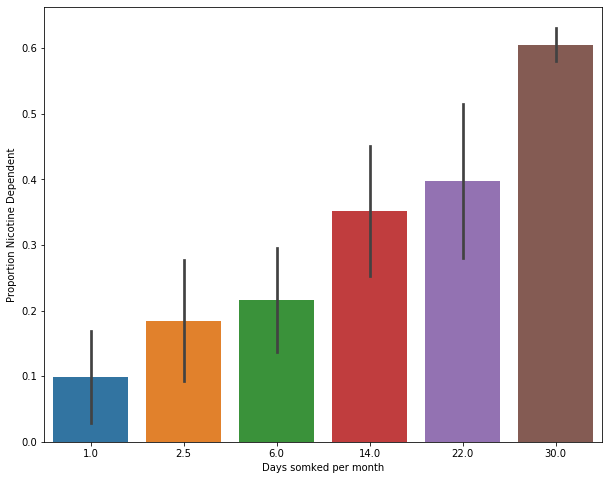

In [88]:
plt.figure(figsize=(10, 8))
sns.barplot(x='USFREQMO', y='TAB12MDX', data=sub1)
plt.xlabel('Days somked per month')
plt.ylabel('Proportion Nicotine Dependent');

Now I can visualize the association, and see even more clearly that there seems to be a positive linear relationship, that is the more days per month a young adult smokes, the more likely they are to have nicotine dependence. I know from looking at the significant P value, that I will accept the alternate hypothesis. That not all nicotine dependents rates are equal across smoking frequency categories. If my explanatory variably had only two levels, I could interpret the two corresponding column percentages and be able to say which group had a significantly higher rate of nicotine dependents. But my explanatory variable has six categories. So I know that not all are equal. But I don't know which are different and which are not.

# Post Hoc Test for Chi Square Test of Independence

To determine which groups are different from the others, we will again need to perform a post hoc test. By conducting post hoc comparisons between pairs of rates in a way that avoids excessive type one error, in other words, avoids rejecting the null hypothesis when the null hypothesis is true. We will be much better able to appropriately describe which population rates are different from the others.
If we reject a null hypothesis, we need to perform comparisons for each pair of nicotine dependent's rates across the six smoking frequency categories. In the case of six groups, we actually need to perform 15 pair wise comparisons.

So, to appropriately protect against type 1 error in the context of a chi-squared test, we will use the post doc approach known as the Bonferroni Adjustment. The goal of using the Bonferroni adjustment, is to control the family-wise error rate, also known as the maximum overall type 1 error rate. So that we can evaluate which pairs of nicotine dependence rates are different from one another.

Briefly, the process would be to conduct each of the 15 paired comparisons. But rather than evaluating significance at the p .05 level, we would adjust the p value to make it more difficult to reject the null hypothesis. The adjusted p value is calculated by dividing p 0.05 by the number of comparisons that we plan to make. So if we make 3 comparisons we would only reject the null hypothesis if the p value were .017 or less.


In [95]:
# first pair
recode2 = {1: 1, 2.5: 2.5}
sub1['COMP1v2'] = sub1['USFREQMO'].map(recode2)

ct2 = pd.crosstab(sub1['TAB12MDX'], sub1['COMP1v2'])
ct2

COMP1v2,1.0,2.5
TAB12MDX,,
0,64,53
1,7,12


In [96]:
colsum2 = ct2.sum(axis=0)
colpct2 = ct2 / colsum2
colpct2

COMP1v2,1.0,2.5
TAB12MDX,,
0,0.901408,0.815385
1,0.098592,0.184615


Again, I want to focus here on the column percentages. 9.86% and 18.46%. Are these two rates significantly different from one another? If I look down at my chi-square value and probability value, a p value of 0.23, I can see that they aren't.

In [102]:
print('Bonferroni Corrected p_value: ' , 0.05 / 15)
print()
print('Chi-square value, p value, expected counts')
cs2 = scipy.stats.chi2_contingency(ct2)
print(cs2)


Bonferroni Corrected p_value:  0.0033333333333333335

Chi-square value, p value, expected counts
(1.4348930637007287, 0.2309675448977717, 1, array([[61.08088235, 55.91911765],
       [ 9.91911765,  9.08088235]]))


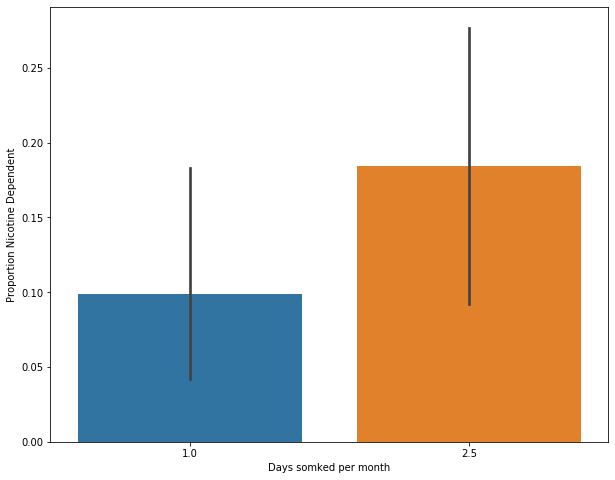

In [98]:
plt.figure(figsize=(10, 8))
sns.barplot(x='COMP1v2', y='TAB12MDX', data=sub1)
plt.xlabel('Days somked per month')
plt.ylabel('Proportion Nicotine Dependent');

As we can see, smoking frequency group 30, that is, those who smoke 30 days in a usual month, is significantly different from each of the other smoking frequency levels. In addition, smoking frequency group 1 has significantly different nicotine dependence rates, than smoking frequency groups of 14 and 22.

![Results of Post Hoc](chisquareposthoc.png)

Here are the p values that are less than 0.003. As we can see, smoking frequency group 30, that is, those who smoke 30 days in a usual month, is significantly different from each of the other smoking frequency levels. In addition, smoking frequency group 1 has significantly different nicotine dependence rates, than smoking frequency groups of 14 and 22.